<a href="https://colab.research.google.com/github/SimonDelgado/Procesamiento-Digital-Multimedia/blob/main/Actividad%207/Actividad_7_DelgadoSimon_202840051.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 7</h2></center>
<center><h3>Image</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Simón Delgado</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Operaciones usando Pytorch y OpenCV

### 1.1 Instala Numpy, Pytorch y OpenCV:
- Carga una imagen desde un archivo con extensión JPG, usando numpy, pytorch y opencv.
- Presenta la imagen
- Transforma la imagen de color a escala de grises usando cada uno de los paquetes
- Guarda la imagen nueva.
- Presenta la imagen transformada en el notebook.

<p align="justify">
Asegurate de presentar adecuandamente la imagen, usando Matplotlib u otro medio de ploteo.

In [66]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import torch
import matplotlib.pyplot as plt
from google.colab import files

In [67]:
from matplotlib import colormaps
# list(colormaps)

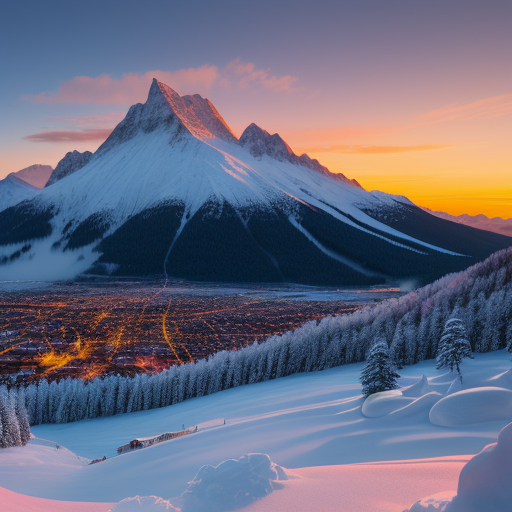

In [68]:
image = cv2.imread('/content/image.png')
cv2_imshow(image) #cv2_imshow muestra las imágenes en una mejor calidad que matplotlib

(-0.5, 511.5, 511.5, -0.5)

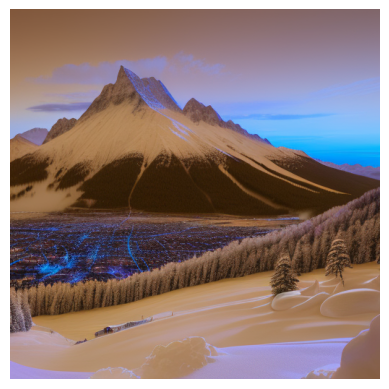

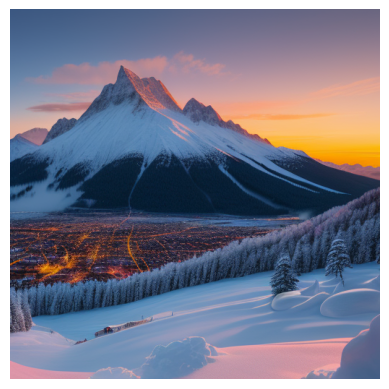

In [69]:
plt.figure()
plt.imshow(image) # la imagen está originalmente en BGR y los canales de matplotlib en RGB
plt.axis('off')
plt.figure()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) # cv2.COLOR cambia los canales, en este caso de BGR a RGB
plt.axis('off')

Ya que openCV es mejor herramienta para procesar las imágenes, ya que no requiere de cambios extras como matplotlib, se utilizará éste.

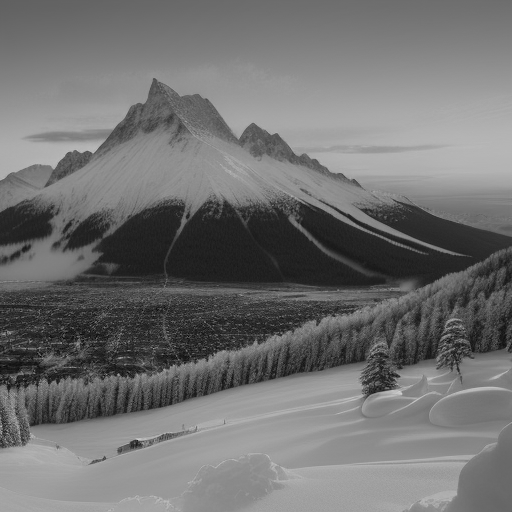

In [70]:
# Y = 0.299 * R + 0.587 * G + 0.114 * B este vector transforma los canales para obtener la escala de grises
gray = np.dot(image[...,:3], [0.299, 0.587, 0.114])
cv2_imshow(gray)

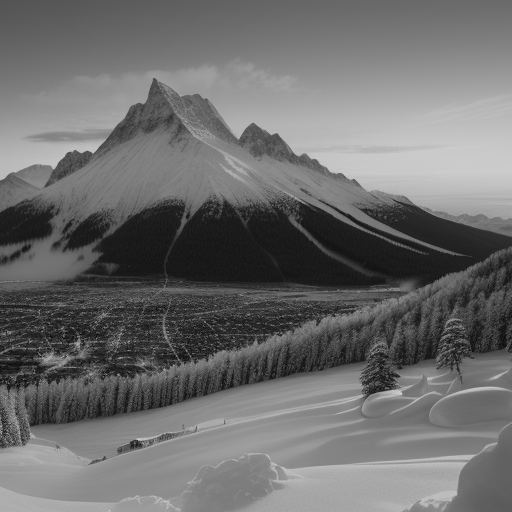

In [71]:
cv2_imshow(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
# cv2.imwrite('/content/image_gris.png', cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)) # lo comentado es el código para crear y descargar la imagen
# files.download('/content/image_gris.png')

In [72]:
image_tensor = torch.tensor(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), dtype=torch.float32) # se transforma la imagen a tensor
image_tensor = image_tensor.permute(2,0,1) # se permutan los canales y las dimensiones del tensor
image_tensor = image_tensor / 255 # normalización del tensor
print(image_tensor.shape) # 3 canales de 512x512 pixeles

torch.Size([3, 512, 512])


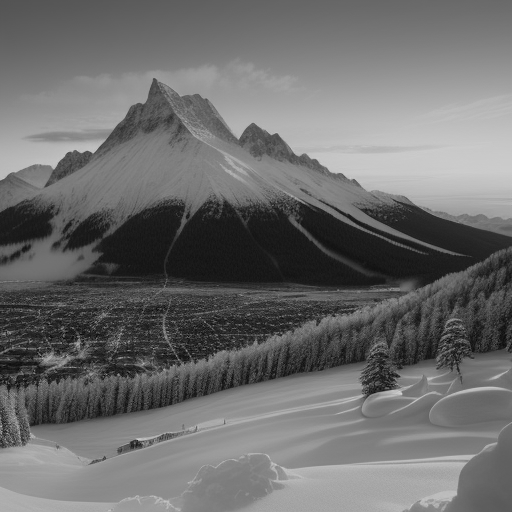

In [73]:
r, g, b = image_tensor[0], image_tensor[1], image_tensor[2] # se asignan a r, g, b sus respectivos canales
gray_image_tensor = 0.2989 * r + 0.5870 * g + 0.1140 * b # se utiliza la función de transformación a escala de grises
gray_image = gray_image_tensor.numpy() # se transforma a numpy para visualización
gray_image = (gray_image * 255).astype(np.uint8)

cv2_imshow(gray_image)

## 2. Multiples operaciones con tensores
### ¡USA LA IMAGEN ADJUNTA image.png!

#### 2.1 Aplica una transformación puntual. Modifica el valor de los pixeles considerando un valor de umbral (threshold). la función de treshold debe ser una rampa con una pendiente dada (tu defines el valor de la pendiente) y cuyo valor mínimo será 0 y el máximo será 255 (valores típicos de los pixeles).

In [74]:
def threshold_ramp(tensor, threshold=0.6, slope=2.0):

    tensor_out = tensor.clone()
    tensor_out[tensor > threshold] = torch.clamp(slope * (tensor_out[tensor > threshold] - threshold), 0, 1) # se discrimina si el valor del pixel es mayor o menor al umbral
    tensor_out[tensor <= threshold] = 0
    return tensor_out

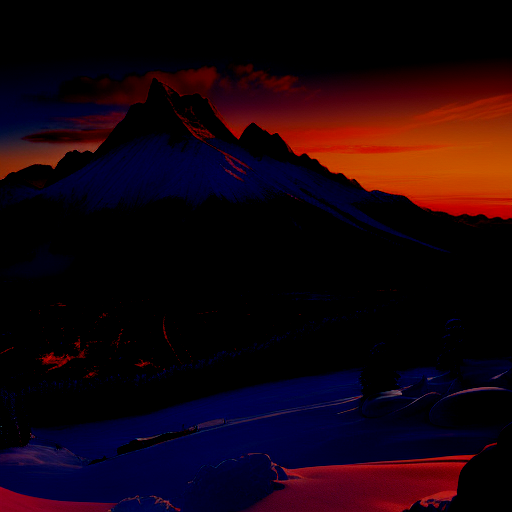

In [75]:
imagen_transformada = threshold_ramp(image_tensor) # se aplica la función de rampa con umbral

imagen_transformada_np = imagen_transformada.permute(1, 2, 0).numpy() # se convierte a numpy para poder visualizar
imagen_transformada_np = (imagen_transformada_np * 255).astype(np.uint8)


cv2_imshow(cv2.cvtColor(imagen_transformada_np, cv2.COLOR_BGR2RGB))

#### 2.2 Aplica una transformación en la vecindad.
- Debes hacer una vecindad con dimensiones de 5x5 pixeles.
- Aplica la transformación de tal forma que los pixeles cambien para tener el valor correspondiente al máximo de todos los vecinos.
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.



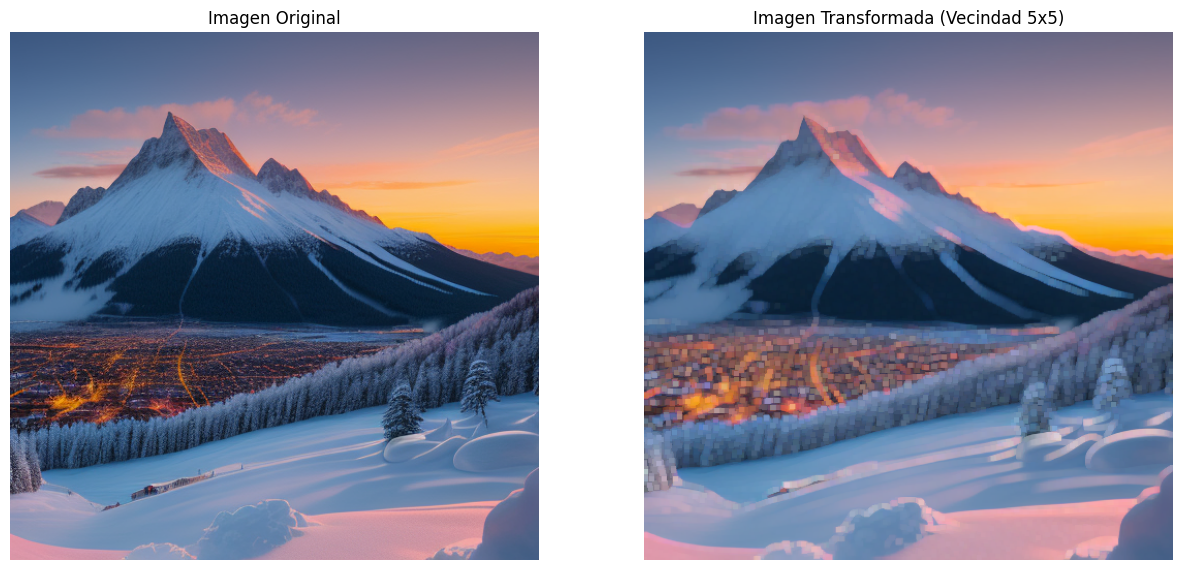

In [76]:
import torch.nn.functional as F

image_tensor = image_tensor.unsqueeze(0) # se agrega una dimensión

def transformacion_vecindad_max(imagen_tensor, tam_vecindad=5): # se define la función de transformación en la vecindad
    padding = tam_vecindad // 2
    imagen_transformada = F.max_pool2d(imagen_tensor, kernel_size=tam_vecindad, stride=1, padding=padding) # se utiliza operación max pooling
    return imagen_transformada

imagen_transformada = transformacion_vecindad_max(image_tensor) # se aplica la transformación


imagen_transformada_np = imagen_transformada.squeeze(0).permute(1, 2, 0).numpy() # se transforma a numpy

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

axs[0].imshow(image_tensor.squeeze(0).permute(1, 2, 0).numpy())
axs[0].set_title('Imagen Original')
axs[0].axis('off')

axs[1].imshow(imagen_transformada_np)
axs[1].set_title('Imagen Transformada (Vecindad 5x5)') # se obtiene la imagen con un efecto de 'blur'
axs[1].axis('off')

plt.show()

#### 2.3 Aplica transformación de intensidad
- Debes hacer una vecindad con dimensiones de 10x10 pixeles.
- Aplica la transformación que aparece en la ecuación de tal forma que los pixeles cambien dependiendo de la posición (r) y el coeficiente c (de tu elección).
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.

In [77]:
def intensidad_transform(tensor, c=0.5):

    _, h, w = tensor.shape # se obtienen las dimensiones del tensor

    tensor_out = torch.zeros_like(tensor) # se crea un tensor vacío que almacena la imagen resultante

    for i in range(0, h, 10): # con los ciclos, se recorre la imagen en bloques de 10x10 pixeles
        for j in range(0, w, 10):
            bloque = tensor[:, i:i+10, j:j+10]

            for x in range(bloque.shape[1]): # se calcula la transformada en cada bloque
                for y in range(bloque.shape[2]):
                    x_tensor = torch.tensor(x, dtype=torch.float32) # se convierten x e y en tensores
                    y_tensor = torch.tensor(y, dtype=torch.float32)
                    r = torch.sqrt(x_tensor**2 + y_tensor**2)
                    tensor_out[:, i+x, j+y] = bloque[:, x, y] * torch.exp(-c * r)

    return tensor_out


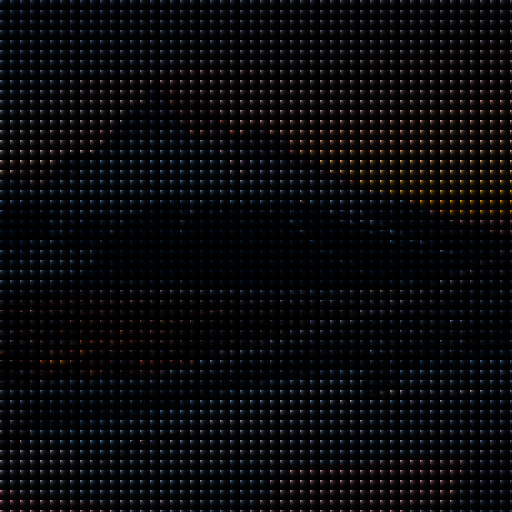

In [78]:
imagen_transformada_tensor = intensidad_transform(torch.tensor(image, dtype=torch.float32).permute(2, 0, 1) / 255.0, c=0.5) # se aplica la transformación de intensidad


imagen_transformada_np = imagen_transformada_tensor.permute(1, 2, 0).numpy() # se convierte a numpy para visualización
imagen_transformada_np = (imagen_transformada_np * 255).astype(np.uint8)

cv2_imshow(imagen_transformada_np)

#### 2.4 Operación con Kernel
- Realiza tres operaciones de convolución en cascada.
- Utiliza torch nn.Conv2d
- Debes calcular el stride, padding y demás parámetros para que obtengas 16 canales de salida.
- Muestra una imagen de cada canal resultante de la convolución.

In [79]:
import torch.nn as nn

In [80]:
# se crean las etapas de convolución

conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, stride=1, padding=1)
conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
conv3 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1)

In [81]:
# se aplican las convoluciones

out1 = conv1(image_tensor)
out2 = conv2(out1)
out3 = conv3(out2)

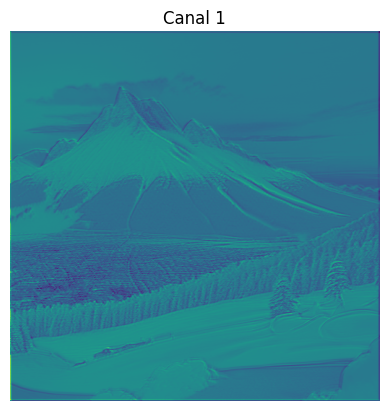

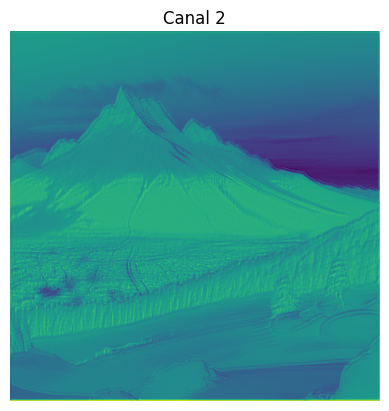

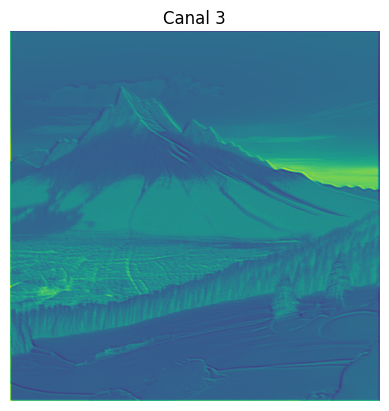

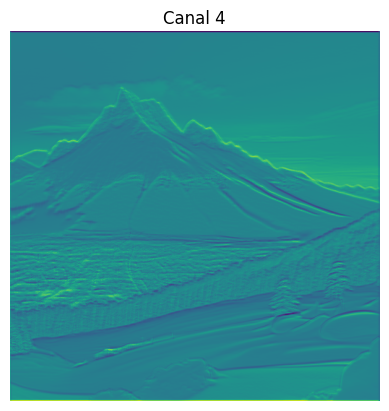

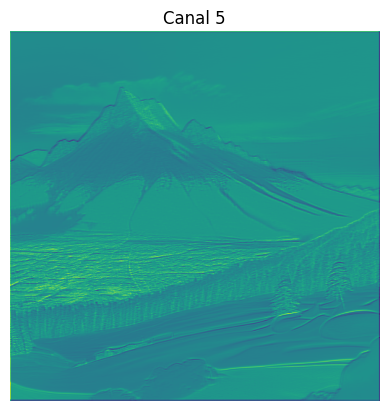

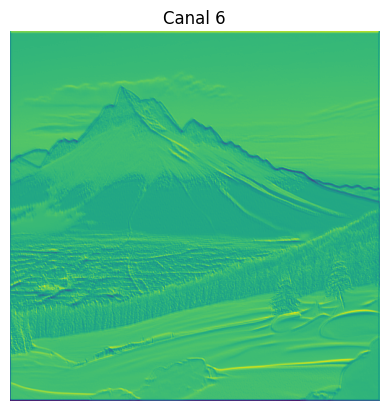

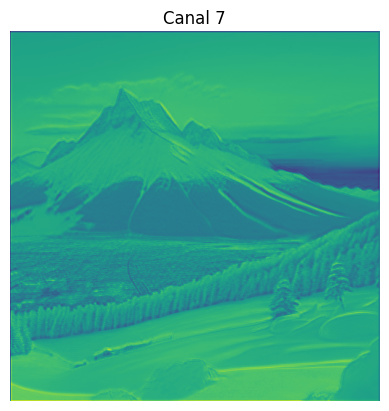

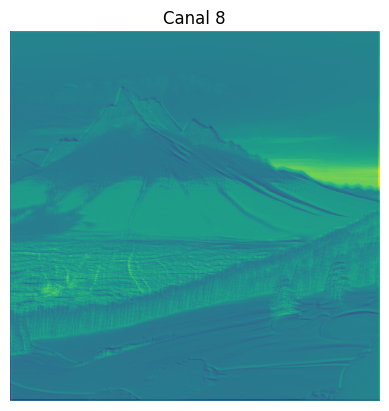

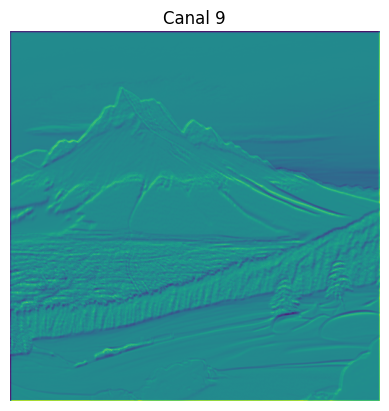

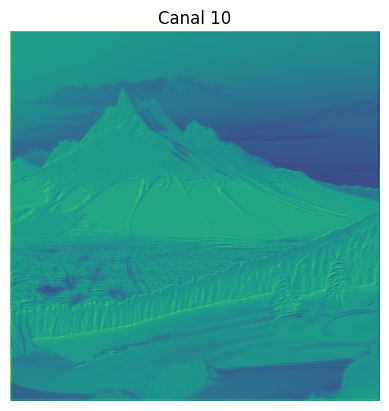

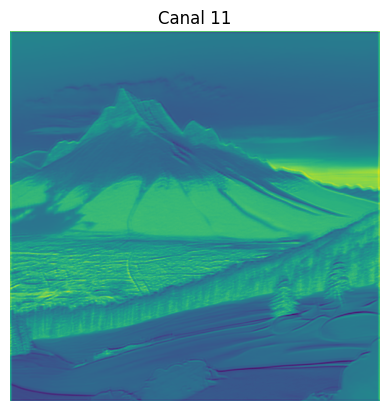

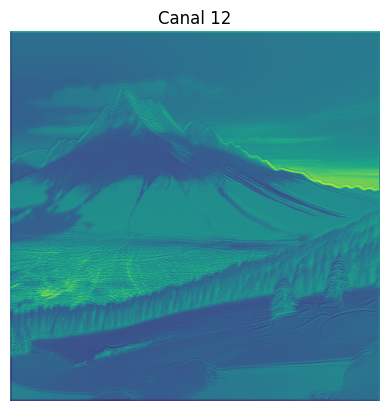

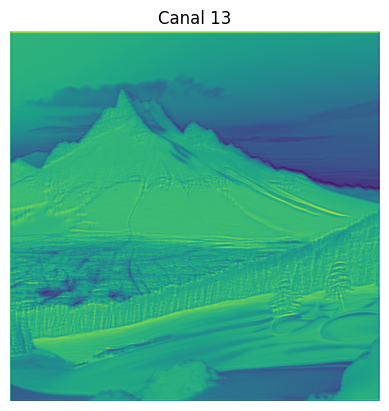

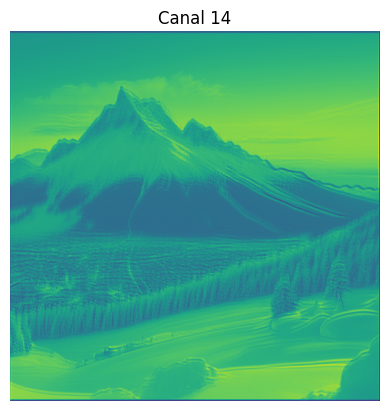

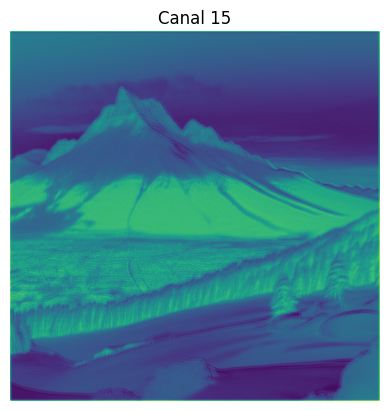

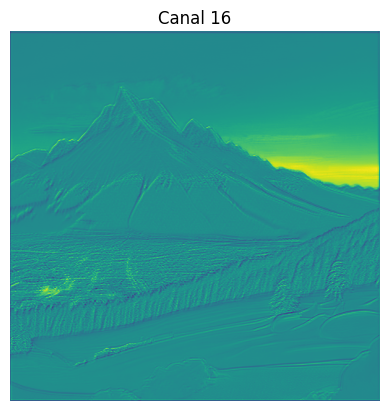

In [82]:
def show_channel(tensor, channel, title):
    plt.imshow(tensor[0, channel].detach().numpy())
    plt.title(title)
    plt.axis('off')
    plt.show()

for i in range(16): # para mostrar los 16 canales
    show_channel(out3, i, f'Canal {i+1}')

## 3. Realiza la inversión de imagen

### 3.1 Utilizando estrictamente numpy, busca y usa una imagen binaria y realizar la inversión de dicha imagen.
### Recuerda adjuntar la imagen a la entrega de tu trabajo.


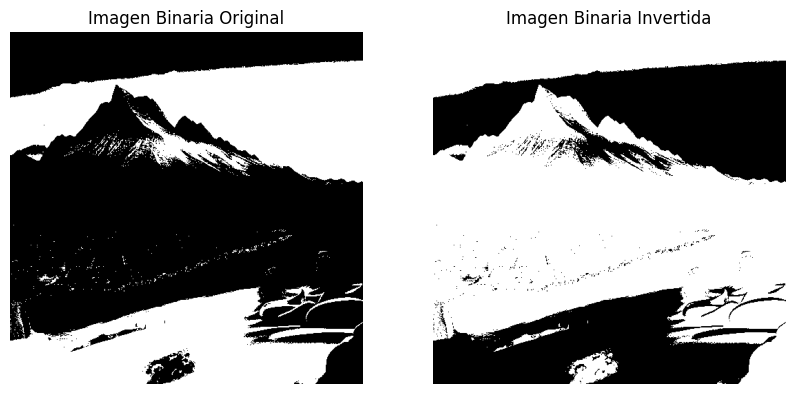

In [83]:
image_bin = cv2.imread('/content/image.png', cv2.IMREAD_GRAYSCALE) # se carga la imagen en escala de grises

_, image_bin = cv2.threshold(image_bin, 128, 255, cv2.THRESH_BINARY) # se obliga a la imagen a ser binaria

imagen_invertida = 255 - image_bin # se invierte la imagen con numpy

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(image_bin, cmap='gray')
axs[0].set_title('Imagen Binaria Original')
axs[0].axis('off')

axs[1].imshow(imagen_invertida, cmap='gray')
axs[1].set_title('Imagen Binaria Invertida')
axs[1].axis('off')

plt.show()


### 3.1 Usando Pytorch y opencv, realiza la inversión de la misma imagen.



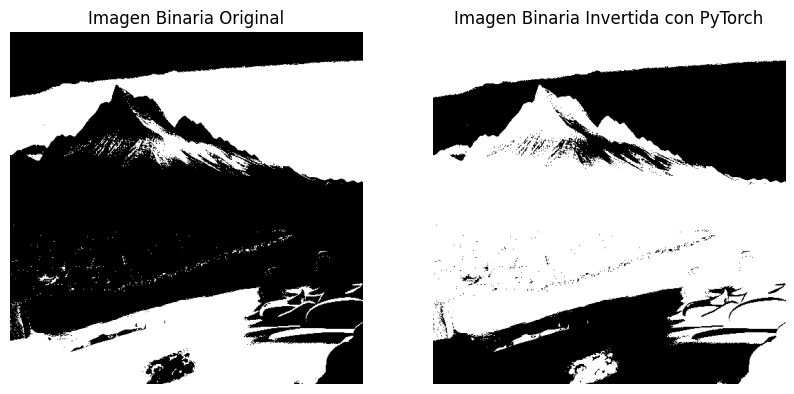

In [84]:
image_bin = cv2.imread('/content/image.png', cv2.IMREAD_GRAYSCALE)

_, image_bin = cv2.threshold(image_bin, 128, 255, cv2.THRESH_BINARY)

image_tensor = torch.tensor(image_bin, dtype=torch.float32) / 255.0 # se convierte a tensor y se normaliza

image_inv_tensor = 1.0 - image_tensor # se invierte usando pytorch

image_inv = (image_inv_tensor.numpy() * 255).astype(np.uint8) # se convierte a numpy para visualización

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(image_bin, cmap='gray')
axs[0].set_title('Imagen Binaria Original')
axs[0].axis('off')

axs[1].imshow(image_inv, cmap='gray')
axs[1].set_title('Imagen Binaria Invertida con PyTorch')
axs[1].axis('off')

plt.show()


## 4. Segmentación de imagen
#### 4.1 Realiza un algoritmo para dividir una imagen con 3 canales RGB de 512x512, en parches (secciones) de 16x16. Presenta cada parche generado de la imagen.
El algoritmo debe tolerar el cambio de imagen por una de menor tamano (128, 64). Claramente, en cada caso el número de parches será menor.
    

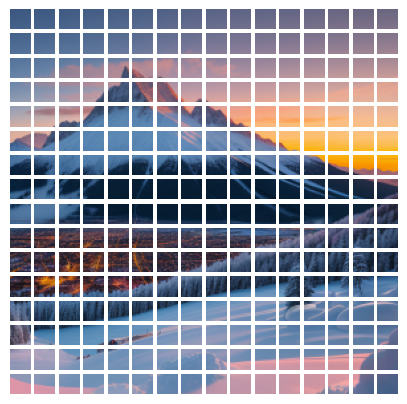

In [85]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def dividir_imagen_en_parches(imagen, tam_parche=16):

    h, w, c = imagen.shape # se obtienen las dimensiones

    num_parches_y = h // tam_parche # se calcula el número de parches en cada dimensión
    num_parches_x = w // tam_parche

    parches = [] # almacena los parches

    for i in range(num_parches_y): # se recorre y almacena cada parche
        for j in range(num_parches_x):
            parche = imagen[i*tam_parche:(i+1)*tam_parche, j*tam_parche:(j+1)*tam_parche]
            parches.append(parche)

    return parches, num_parches_y, num_parches_x


imagen_pequena = cv2.resize(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), (256, 256)) # se redimensiona a un tamaño más pequeño

parches_pequenos, num_parches_y_pequenos, num_parches_x_pequenos = dividir_imagen_en_parches(imagen_pequena, tam_parche=16) # se divide la imagen en los parches

fig, axs = plt.subplots(num_parches_y_pequenos, num_parches_x_pequenos, figsize=(5, 5)) # se visualizan los parches

for i in range(num_parches_y_pequenos):
    for j in range(num_parches_x_pequenos):
        axs[i, j].imshow(parches_pequenos[i * num_parches_x_pequenos + j])
        axs[i, j].axis('off')

plt.show()


## 5. Referencias
<p align="justify">
    
[OpenCV] https://docs.opencv.org/4.x/d7/da8/tutorial_table_of_content_imgproc.html

[inversion] https://medium.com/analytics-vidhya/inverting-an-image-using-numpys-broadcasting-method-1f5beb7f9fa5#:~:text=In%20order%20to%20invert%20the,negation)%20operation%20to%20the%20image.
